In [1]:
import sys
import os.path as osp

from copy import deepcopy
import datetime
import os
import pickle
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from multihist import Hist1d, Histdd
from tqdm.notebook import tqdm
import pandas as pd
from scipy import stats

import strax
import straxen
strax.utils.tqdm = tqdm  # use notebook-aware progress bar

In [2]:
st = straxen.contexts.xenonnt_online()

In [4]:
runs = st.select_runs(run_id='0085*',run_mode='*selftrigger*',available='pulse_counts')

In [5]:
runs

,name,number,mode,start,end,tags,livetime,tags.name,peak_basics_available,raw_records_available,pulse_counts_available
1367,008525,8525,xenonnt_selftrigger_commissioning_lowe,2020-07-08 17:09:19.500,2020-07-08 18:09:21.830,,01:00:02.330000,NaN,True,True,True
1368,008526,8526,xenonnt_selftrigger_commissioning_lowe,2020-07-08 18:09:53.945,2020-07-08 19:09:55.270,,01:00:01.325000,NaN,True,False,True
1369,008527,8527,xenonnt_selftrigger_commissioning_lowe,2020-07-08 19:10:25.380,2020-07-08 20:10:27.790,,01:00:02.410000,NaN,True,True,True
1370,008528,8528,xenonnt_selftrigger_commissioning_lowe,2020-07-08 20:10:59.912,2020-07-08 21:11:02.421,,01:00:02.509000,NaN,True,False,True
1373,008531,8531,xenonnt_selftrigger_commissioning_lowe,2020-07-08 23:12:44.149,2020-07-09 00:12:47.749,,01:00:03.600000,NaN,True,False,True
1374,008532,8532,xenonnt_selftrigger_commissioning_lowe,2020-07-09 00:13:22.873,2020-07-09 01:13:25.307,,01:00:02.434000,NaN,True,False,True
1375,008533,8533,xenonnt_selftrigger_commissioning_lowe,2020-07-09 01:13:57.423,2020-07-09 02:13:59.083,,01:00:01.660000,NaN,True,False,True
1376,008534,8534,xenonnt_selftrigger_commissioning_lowe,2020-07-09 02:14:28.201,2020-07-09 03:14:28.855,,01:00:00.654000,NaN,True,False,True
1377,008535,8535,xenonnt_selftrigger_commissioning_lowe,2020-07-09 03:15:01.976,2020-07-09 03:26:46.314,,00:11:44.338000,NaN,True,False,True
1378,008536,8536,xenonnt_selftrigger_commissioning_lowe,2020-07-09 03:27:21.440,2020-07-09 03:31:03.885,,00:03:42.445000,NaN,True,False,True


In [1]:
def pulse_rate(run_name):
    pulsec = st.get_array(run_name,'pulse_counts', max_workers=20)
    total_livetime_sec = runs.iloc[0]['livetime'].total_seconds()
    #print(f'Run {run_name}, duration: {total_livetime_sec/3600:.2f} hours')
    straxen.plot_pmts(pulsec['pulse_count'].sum(axis=0) / total_livetime_sec,
                  label=f'Pulse rate [Hz] - run {run_name}',
                  cmap=plt.cm.jet, vmin=0.8)
    return pulsec['pulse_count'].sum(axis=0)

In [2]:
for i in range(1):#len(runs)):
    run_name = runs.iloc[i]['name']
    pulse_rate(run_name)

NameError: name 'runs' is not defined

In [77]:
def pulse_rate_stab(pmt):
    run_n, pulse_r = [], np.zeros(len(runs))
    for i in range(len(runs)):
        run_name = runs.iloc[i]['name']
        pulsec = st.get_array(run_name,'pulse_counts', max_workers=20)
        total_livetime_sec = runs.iloc[0]['livetime'].total_seconds()
        pulse_rate = pulsec['pulse_count'].sum(axis=0) / total_livetime_sec
        pulse_r[i] = pulse_rate[pmt]
        run_n.append(runs.iloc[i]['number'])
    plt.plot(run_n,pulse_r,'.',label=f'PMT n.{pmt}')
    plt.xlabel('run', ha='right', x=1)
    plt.ylabel('pulse rate [Hz]', ha='right', y=1)
    plt.legend()

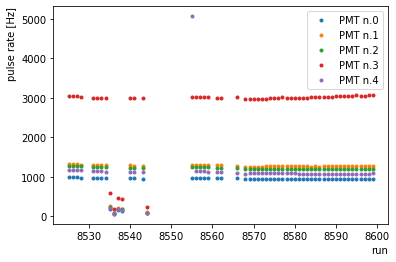

In [78]:
for i in range(5):
    pulse_rate_stab(i)

In [79]:
def pulse_rate_PMTarray(run_name):
    pulsec = st.get_array(run_name,'pulse_counts', max_workers=20)
    total_livetime_sec = runs.iloc[0]['livetime'].total_seconds()
    pulse_rate = pulsec['pulse_count'].sum(axis=0) / total_livetime_sec
    return pulse_rate

In [80]:
pulse_rate_total = []
for i in range(len(runs)):
    run_name = runs.iloc[i]['name']
    pulse_rate_total.append(pulse_rate_PMTarray(run_name))

In [100]:
pulse_rate_total = np.array(pulse_rate_total)
print(pulse_rate_total.shape)

(56, 494)


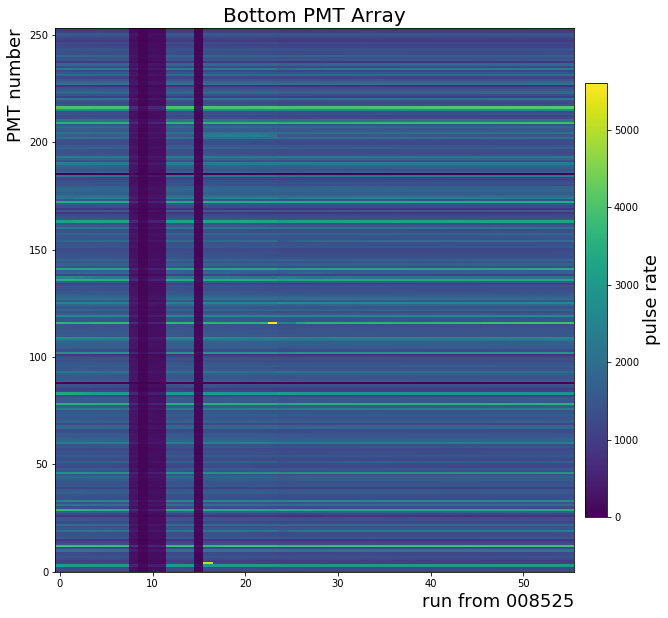

In [155]:
fig = plt.figure(figsize=(10,10))
heatmap = plt.imshow(pulse_rate_total.transpose(), cmap='viridis',
           origin='lower',aspect='auto',)
cbar = fig.colorbar(heatmap, shrink=0.8, aspect=20, fraction=.05,pad=.02)
cbar.set_label('pulse rate',size=18)
plt.xlabel('run from 008525', ha='right', x=1,size=18)
plt.ylabel('PMT number', ha='right', y=1,size=18)
plt.title('Bottom PMT Array',size=20)
plt.ylim(0,253)
plt.savefig('PMT-bottom_pulse-rate.png')

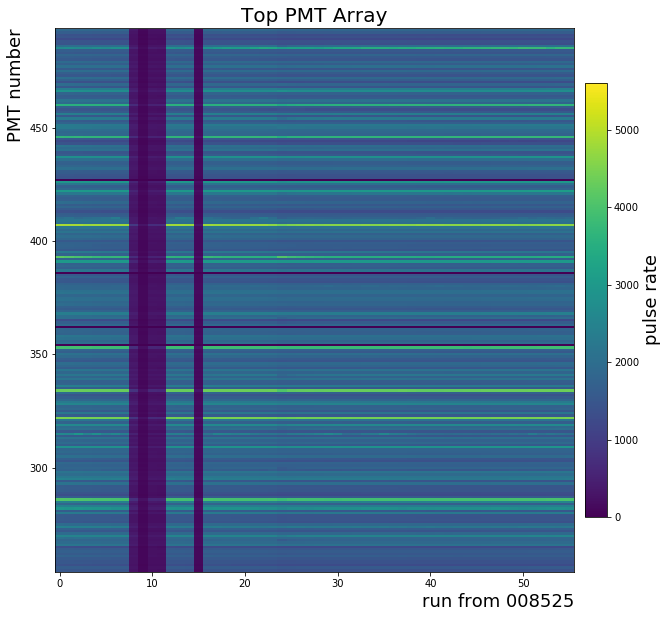

In [156]:
fig = plt.figure(figsize=(10,10))
heatmap = plt.imshow(pulse_rate_total.transpose(), cmap='viridis',
           origin='lower',aspect='auto',)
cbar = fig.colorbar(heatmap, shrink=0.8, aspect=20, fraction=.05,pad=.02)
cbar.set_label('pulse rate',size=18)
plt.xlabel('run from 008525', ha='right', x=1,size=18)
plt.ylabel('PMT number', ha='right', y=1,size=18)
plt.title('Top PMT Array',size=20)
plt.ylim(254,494)
plt.savefig('PMT-top_pulse-rate.png')